# Table Of Contents :
* Problem Statement
* Import Libraries
* Read Data From Url
* Exploratory Data Ananlysis - Data Cleaning 
    * Categorical Features
    * Numeric Features
* Load Clean Data To MongoDB


# Problem Statement

**Aim :** To predict whether person makes over 50K a year based on census data.

**Data Source :** https://archive.ics.uci.edu/ml/datasets/Census+Income

**Data Information :**
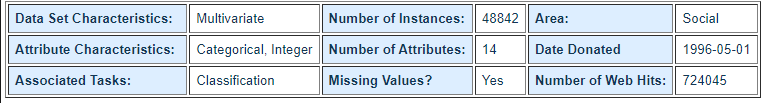

**Attribute Information :**

**age:** continuous.

**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt:** continuous.

**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education_num:** continuous.

**marital_status:** Married-civ-spouse, Divorced, Never-married, Separated, 
Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex:** Female, Male.

**capital_gain:** continuous.

**capital_loss:** continuous.

**hours_per_week:** continuous.

**native_country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**salary :** 50K, <=50K.



# Import Libraries

In [369]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pymongo import MongoClient
import urllib.request
import os 
from dotenv import load_dotenv
import certifi
ca = certifi.where()

# Read Data From Url

In [370]:
uci_income_1_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
uci_income_2_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [371]:
df_1=pd.read_csv(uci_income_1_url, sep=',', header=None)
df_2=pd.read_csv(uci_income_2_url, sep=',',header=None, skiprows=1)

In [372]:
df_1.shape

(32561, 15)

In [373]:
df_2.shape

(16281, 15)

In [374]:
df = pd.concat([df_1,df_2])

In [375]:
# Assign column names
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary']

# Exploratory Data Ananlysis - Data Cleaning 

In [376]:
df.shape

(48842, 15)

In [377]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [378]:
# Checking missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [379]:
# Checking duplicates
df.duplicated().sum()

29

In [380]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [381]:
# General information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       48813 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education_num   48813 non-null  int64 
 5   marital_status  48813 non-null  object
 6   occupation      48813 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital_gain    48813 non-null  int64 
 11  capital_loss    48813 non-null  int64 
 12  hours_per_week  48813 non-null  int64 
 13  native_country  48813 non-null  object
 14  salary          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [382]:
# Summary statistics of numeric features
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48813.000000,4.881300e+04,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,1.896679e+05,10.078688,1079.708705,87.554299,40.425051
std,13.709005,1.056062e+05,2.570257,7454.185982,403.118605,12.390954
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [383]:
# Split catgorical and numeric features
cat_features = [col for col in df.columns if df[col].dtype == object]
num_features = [col for col in df.columns if df[col].dtype == 'int64']

In [384]:
# See categorical features
cat_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [385]:
# See numerical features
num_features

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

## Categorical Features

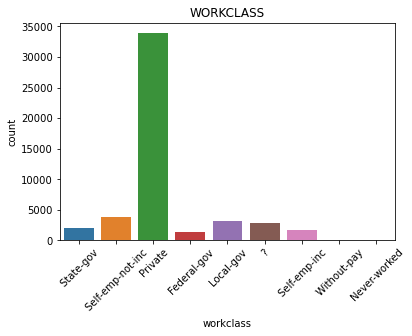

 Private             33879
 Self-emp-not-inc     3861
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1694
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64


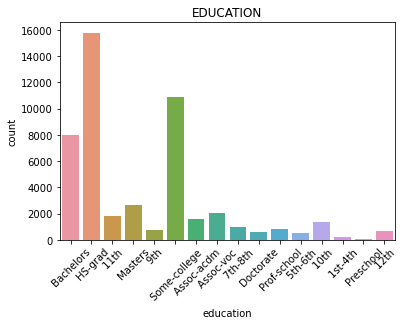

 HS-grad         15777
 Some-college    10869
 Bachelors        8020
 Masters          2656
 Assoc-voc        2060
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           954
 Prof-school       834
 9th               756
 12th              656
 Doctorate         594
 5th-6th           508
 1st-4th           245
 Preschool          82
Name: education, dtype: int64


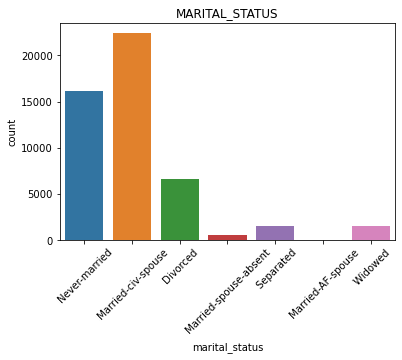

 Married-civ-spouse       22372
 Never-married            16098
 Divorced                  6630
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64


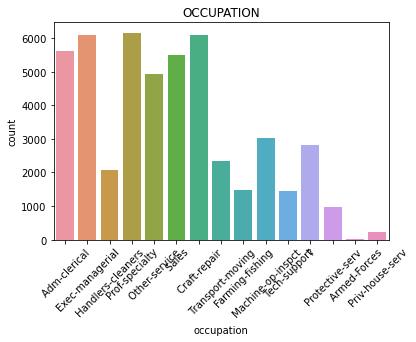

 Prof-specialty       6167
 Craft-repair         6107
 Exec-managerial      6084
 Adm-clerical         5608
 Sales                5504
 Other-service        4919
 Machine-op-inspct    3019
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2071
 Farming-fishing      1487
 Tech-support         1445
 Protective-serv       983
 Priv-house-serv       240
 Armed-Forces           15
Name: occupation, dtype: int64


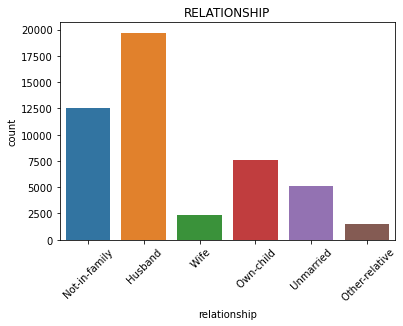

 Husband           19709
 Not-in-family     12567
 Own-child          7576
 Unmarried          5124
 Wife               2331
 Other-relative     1506
Name: relationship, dtype: int64


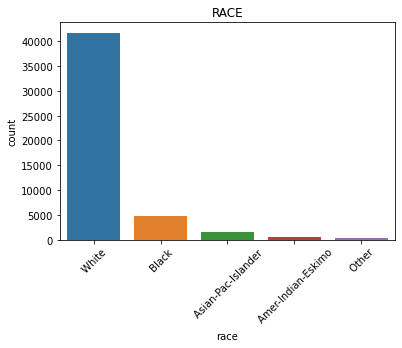

 White                 41736
 Black                  4683
 Asian-Pac-Islander     1518
 Amer-Indian-Eskimo      470
 Other                   406
Name: race, dtype: int64


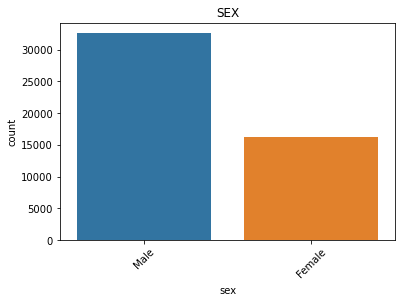

 Male      32631
 Female    16182
Name: sex, dtype: int64


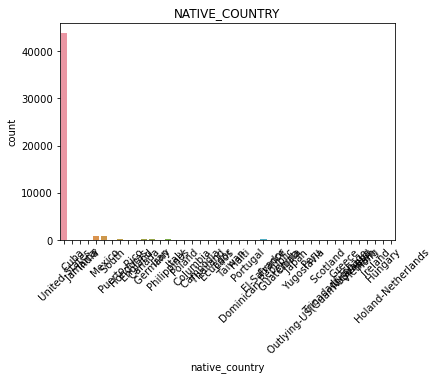

 United-States                 43810
 Mexico                          947
 ?                               856
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Poland                           87
 Guatemala                        86
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

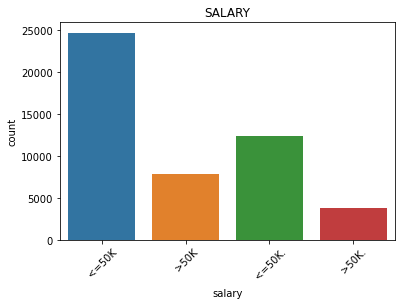

 <=50K     24698
 <=50K.    12430
 >50K       7839
 >50K.      3846
Name: salary, dtype: int64


In [386]:
# Check and visualize unique values for each categoric features
for col in cat_features:
    sns.countplot(data=df, x=col)
    plt.title(col.upper())
    plt.xticks(rotation=45)
    plt.show()
    print(df[col].value_counts())


**Observations :**
* There are null values represented by '?' in the workclass, occupation and native_country features. They need to be treat as missing values.

* There are whitespaces that needs to be removed. 

* 'salary' column has similar values need to replace '.' with ''.

* Most of the countries is United States. 'native_country' column will be dropped.

* education and education_num features store the same information. So we will keep education_num and will drop education feature. 


In [387]:
# Replace ? values with np.nan 
df.replace(' ?',np.nan, inplace=True)

In [388]:
# Checking number of nan values.
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     856
salary               0
dtype: int64

In [389]:
# Drop nan values
df.dropna(inplace = True)
df.shape # in total 3648 values are deleted

(45194, 15)

In [390]:
# Clean whitespaces from the data
df[cat_features] = df[cat_features].apply(lambda x : x.str.strip())

In [391]:
# Check 'salary' column
df['salary'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [392]:
# Clean 'salary' column
df['salary'] = df['salary'].str.replace('.','',regex=True)

In [393]:
# Remove 'native_country' 
df.drop(['native_country'], axis=1, inplace=True)

In [394]:
# Update categoric features list
cat_features = [col for col in df.drop('salary', axis=1).columns if df[col].dtype == object]

In [395]:
# Check percentage of each categories
for col in cat_features:
    print(df[col].value_counts(normalize=True))

Private             0.736403
Self-emp-not-inc    0.083971
Local-gov           0.068593
State-gov           0.043059
Self-emp-inc        0.036399
Federal-gov         0.031110
Without-pay         0.000465
Name: workclass, dtype: float64
HS-grad         0.326968
Some-college    0.218834
Bachelors       0.167389
Masters         0.055605
Assoc-voc       0.043324
11th            0.035823
Assoc-acdm      0.033345
10th            0.027061
7th-8th         0.018188
Prof-school     0.017370
9th             0.014958
12th            0.012745
Doctorate       0.012037
5th-6th         0.009913
1st-4th         0.004868
Preschool       0.001571
Name: education, dtype: float64
Married-civ-spouse       0.465726
Never-married            0.322609
Divorced                 0.139266
Separated                0.031221
Widowed                  0.028256
Married-spouse-absent    0.012214
Married-AF-spouse        0.000708
Name: marital_status, dtype: float64
Craft-repair         0.133093
Prof-specialty       0.13282

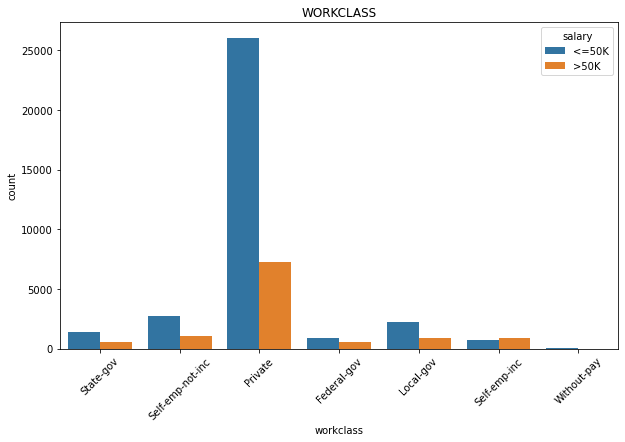

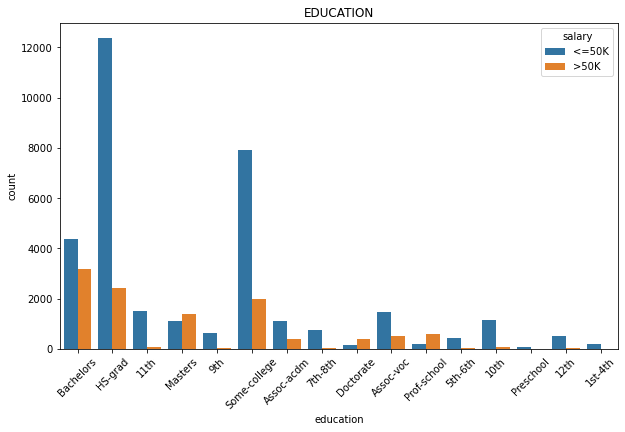

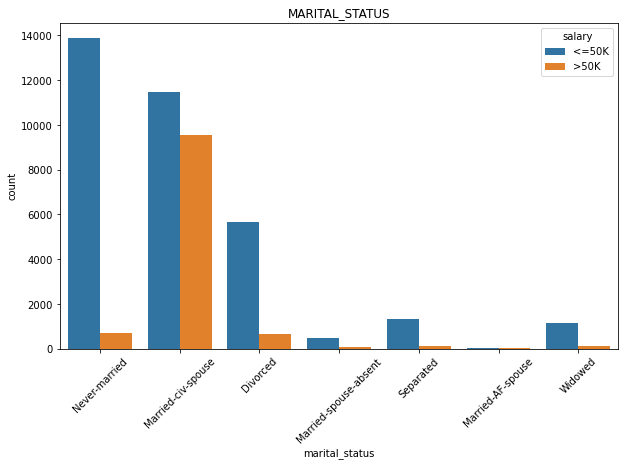

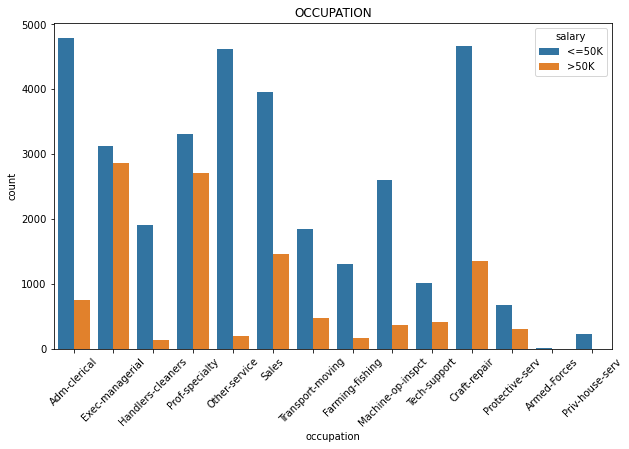

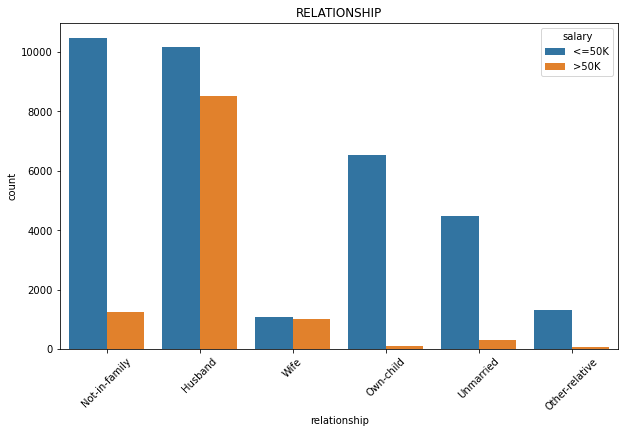

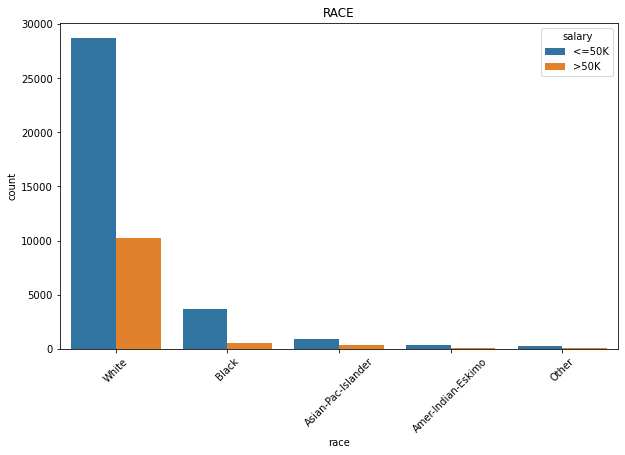

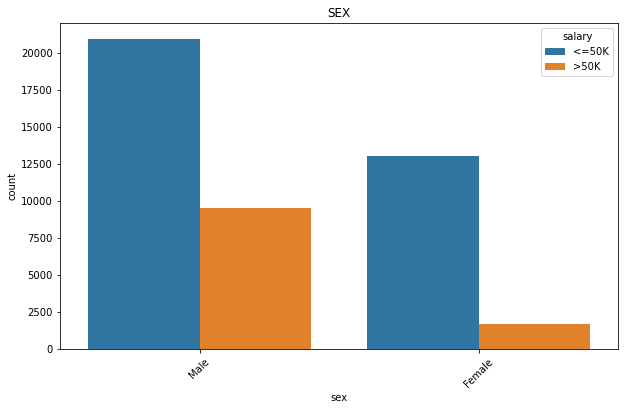

In [396]:
# Visualize remaining categoric features vs salary
for col in cat_features:
    plt.figure(figsize=(10,6))
    sns.countplot(data = df , x= col, hue='salary')
    plt.title(col.upper())
    plt.xticks(rotation=45)
    plt.show()

In [397]:
# Remove education
df.drop(['education'], axis=1, inplace=True)

**Observations:**
* 73% of the employees work in private companies.
* 86% of the employee's race is 'White'
* 67% of the employees are male.
* Self-emp-inc is the only class that mostly earns more than 50k annually. 
* People who have 'Masters', 'Doctorate' or 'Prof-school' education degrees mostly earn more than 50k annually
* 'Exec-manageral' and 'Prof-speciality' earn more than other occupations.

## Numeric Features

In [398]:
# Check summary statistic of numeric features
df[num_features].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,45194.000000,4.519400e+04,45194.000000,45194.000000,45194.000000,45194.000000
mean,38.551755,1.897379e+05,10.119109,1102.112736,88.650308,40.941209
std,13.215806,1.056407e+05,2.552057,7508.705003,405.075515,12.006449
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173922e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


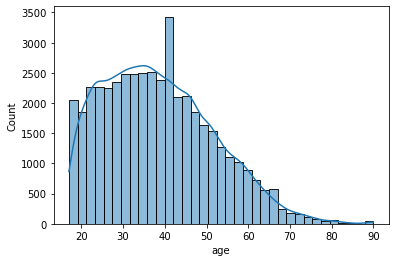

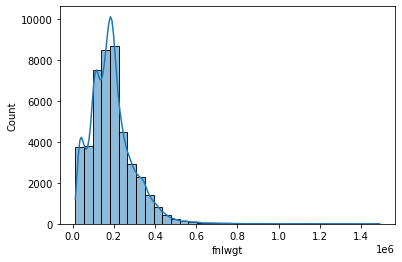

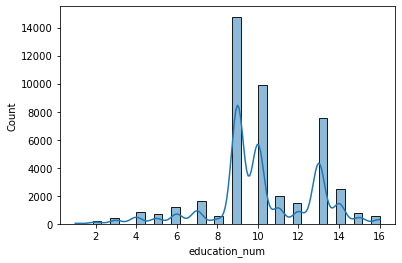

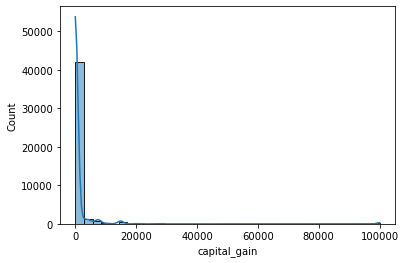

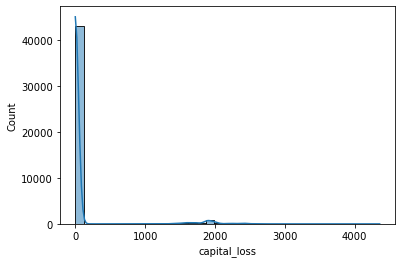

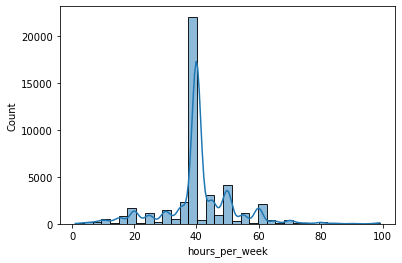

In [399]:
# Visualize numeric feature distributions
for col in num_features:
    sns.histplot(data=df[col], bins=35, kde = True)
    plt.show()

In [400]:
df['capital_gain'].value_counts(normalize=True)

0        0.916139
15024    0.011019
7688     0.008652
7298     0.007767
99999    0.005067
           ...   
22040    0.000022
1639     0.000022
2387     0.000022
7262     0.000022
1731     0.000022
Name: capital_gain, Length: 121, dtype: float64

In [401]:
df['capital_loss'].value_counts(normalize=True)

0       0.952649
1902    0.006505
1977    0.005443
1887    0.005045
2415    0.001505
          ...   
155     0.000022
419     0.000022
2080    0.000022
4356    0.000022
2163    0.000022
Name: capital_loss, Length: 97, dtype: float64

**Observations :**
* Most of the values (over 90%) in capital_gain and capital_loss columns are 0. 
* Most of the employees works 40 hours.


In [402]:
# Remove capital_gain and capital_loss, because more than 90% of data is 0
df.drop(['capital_loss','capital_gain'], axis=1,inplace=True)

In [403]:
# Update numeri features
num_features = [col for col in df.columns if df[col].dtype == 'int64']

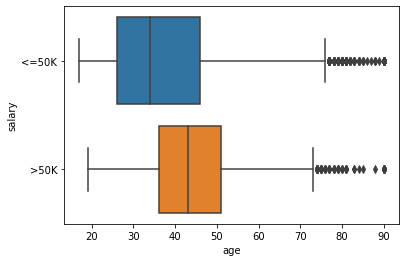

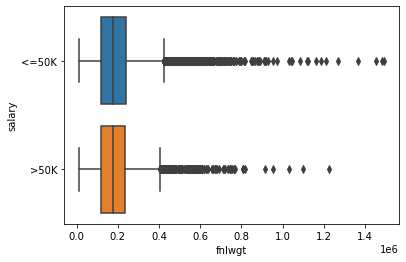

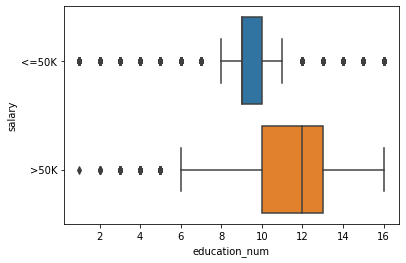

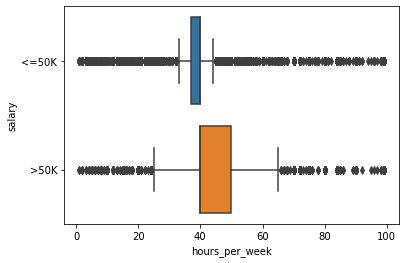

In [404]:
# Visualize remaining numeric features vs salary
for col in num_features:
    sns.boxplot(data=df, x=col, y='salary')
    plt.show()

<AxesSubplot:>

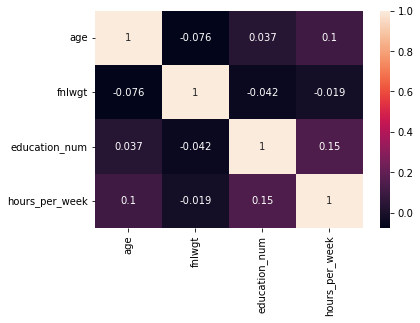

In [405]:
# Visualize correlation between numeric features
sns.heatmap(df.corr(), annot=True)

In [406]:
df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


# Load Clean Data To MongoDB

In [407]:
load_dotenv()
username = os.getenv('USER_NAME')
password = os.getenv('PASSWORD')
client = MongoClient('mongodb+srv://'+ username + ':' + password +'@mycluster.yrgvltw.mongodb.net/?retryWrites=true&w=majority', tlsCAFile=ca)

In [408]:
mydb = client['mydatabase']
# Create collection
mycol = mydb['census_income_cleaned']

In [409]:
# Convert df to dict
df.reset_index(inplace=True)
df_dict = df.to_dict("records")

In [410]:
# Insert records to collection
mycol.insert_many(df_dict)

In [411]:
# Close  MongoDB connection
client.close()